# Intializer Section

##### Import Libraries

In [2]:
import tensorflow as tf
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler


In [3]:
from helper import helper

_helper = helper()

##### Reset Import of Custom functions

In [8]:
from importlib import reload
reload(sys.modules["helper"])

from helper import helper

_helper = helper()

# CNN Architecture
- Input Layer
- Convolution Layer (Nodes, activator, kernel size, stride, padding)
- Pooling Layer (activator, kernel size, stride, padding)
- Fully Connected Layer (Nodes, activator)
- Output Layer(Output Nodes, activator)

# Activity 1

## Zip Download and Extraction

** Download the zip file and Extract: **

_helper.data_preparations.zip_processing(
  "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip",
  "pizza_steak.zip"
)

## Inspect Data 

In [3]:
_helper.data_preparations.data_checking("./resources/pizza_steak/")

There are 3 directories and 0 files in ./resources/pizza_steak/
There are 0 directories and 4 files in ./resources/pizza_steak/custom tester
There are 2 directories and 0 files in ./resources/pizza_steak/test
There are 0 directories and 250 files in ./resources/pizza_steak/test\pizza
There are 0 directories and 250 files in ./resources/pizza_steak/test\steak
There are 2 directories and 0 files in ./resources/pizza_steak/train
There are 0 directories and 750 files in ./resources/pizza_steak/train\pizza
There are 0 directories and 750 files in ./resources/pizza_steak/train\steak


## Preparations of Test and Train Data set

In [9]:
test_data_ps, train_data_ps, class_names = _helper.data_preparations.train_test_dir_setter(
  "./resources/pizza_steak/",
)

print(
  "\n\n" +
  "Data Count: \n" +
  f"Train: {len(train_data_ps)}\n" +
  f"Test: {len(test_data_ps)}\n" +
  f"Class names #: {len(class_names)}"
)

Test Data: 
Found 500 files belonging to 2 classes.
Train Data: 
Found 1500 files belonging to 2 classes.
Class Names: ['pizza', 'steak']


Data Count: 
Train: 47
Test: 16
Class names #: 2


### Data Visualization

Image Shape: (array([512, 512,   3]), 2)


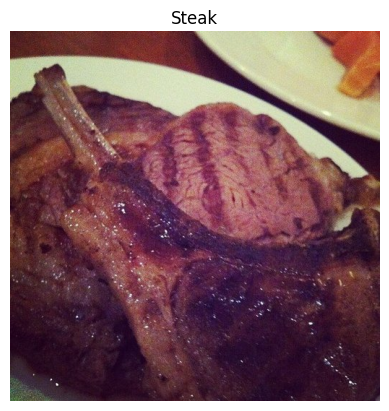

In [14]:
_helper.evaluation.view_random_image(
  "./resources/pizza_steak/train",
  "steak"
)

## Model

### Base Model

Model Architecture Defining and Compilation

In [95]:
ps_base_model = Sequential([
  Conv2D(
    filters = 10,
    kernel_size = 3,
    activation = "relu",
    input_shape = (224, 224, 3),
    name = "input_layer"
  ),
  Conv2D(
    10, 3,
    activation = "relu",
    name = "hidden_layer_1"
  ),
  MaxPooling2D(name = "pooling_layer_1"),
  Conv2D(
    10, 3,
    activation = "relu",
    name = "hidden_layer_2"
  ),
  Conv2D(
    10, 3,
    activation = "relu",
    name = "hidden_layer_3"
  ),
  MaxPooling2D(name = "pooling_layer_2"),
  Flatten(name = "fully_connected_layer"),
  Dense(
    1,
    activation = "sigmoid",
    name = "output_layer"
  )
], name = "PS_Base_Model")

ps_base_model.compile(
  loss = "binary_crossentropy",
  optimizer = Adam(),
metrics = ["accuracy"]
)

ps_base_model.summary()

Model: "PS_Base_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 hidden_layer_1 (Conv2D)     (None, 220, 220, 10)      910       
                                                                 
 pooling_layer_1 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 hidden_layer_2 (Conv2D)     (None, 108, 108, 10)      910       
                                                                 
 hidden_layer_3 (Conv2D)     (None, 106, 106, 10)      910       
                                                                 
 pooling_layer_2 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                 

Training/Fitting Model

In [98]:
try:
  ps_base_model_h = ps_base_model.fit(
    train_data_ps,
    epochs = 30,
    validation_data = test_data_ps,
    validation_steps = int(.50 * len(test_data_ps)),
  )
  _helper.notifications.complete()
except Exception as e:
  print(f"Error: {e}")
  _helper.notifications.error()

Epoch 1/30
47/47 [==============================] - 56s 1s/step - loss: 5.9588 - accuracy: 0.5607 - val_loss: 0.6818 - val_accuracy: 0.5664
Epoch 2/30
47/47 [==============================] - 43s 911ms/step - loss: 0.5844 - accuracy: 0.6980 - val_loss: 0.6573 - val_accuracy: 0.6289
Epoch 3/30
47/47 [==============================] - 44s 927ms/step - loss: 0.4109 - accuracy: 0.8173 - val_loss: 0.6777 - val_accuracy: 0.6797
Epoch 4/30
47/47 [==============================] - 44s 928ms/step - loss: 0.2082 - accuracy: 0.9307 - val_loss: 0.6301 - val_accuracy: 0.7070
Epoch 5/30
47/47 [==============================] - 44s 925ms/step - loss: 0.1308 - accuracy: 0.9680 - val_loss: 0.7584 - val_accuracy: 0.7109
Epoch 6/30
47/47 [==============================] - 44s 923ms/step - loss: 0.0702 - accuracy: 0.9867 - val_loss: 0.8184 - val_accuracy: 0.6875
Epoch 7/30
47/47 [==============================] - 44s 926ms/step - loss: 0.0420 - accuracy: 0.9920 - val_loss: 0.9535 - val_accuracy: 0.6992
Ep

Per Piece Evaluation

In [99]:
save_dir = "./saved_files/CNNS/pizza_steak/base_model"
name = "PS_Base_Model_History_Data"

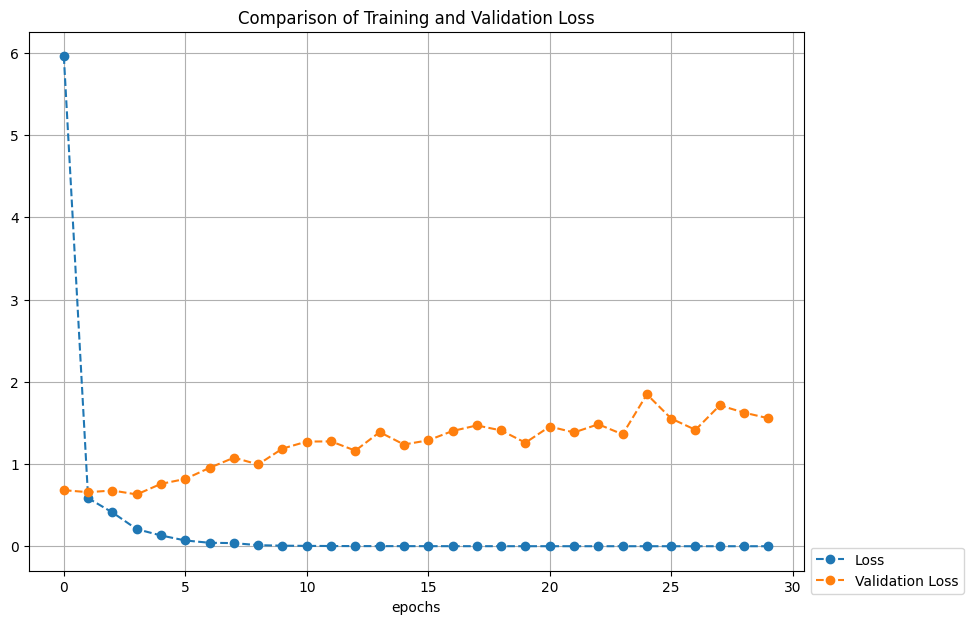

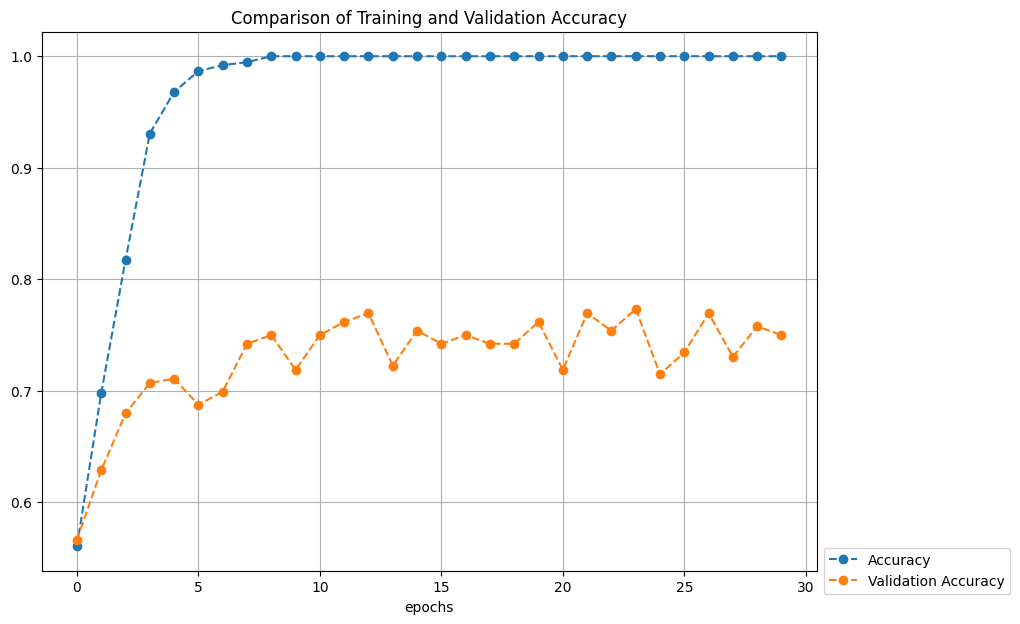

In [100]:
_helper.evaluation.history_plot(
  ps_base_model_h,
  specification = "comp_loss",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

_helper.evaluation.history_plot(
  ps_base_model_h,
  specification = "comp_accuracy",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

Full Evaluation

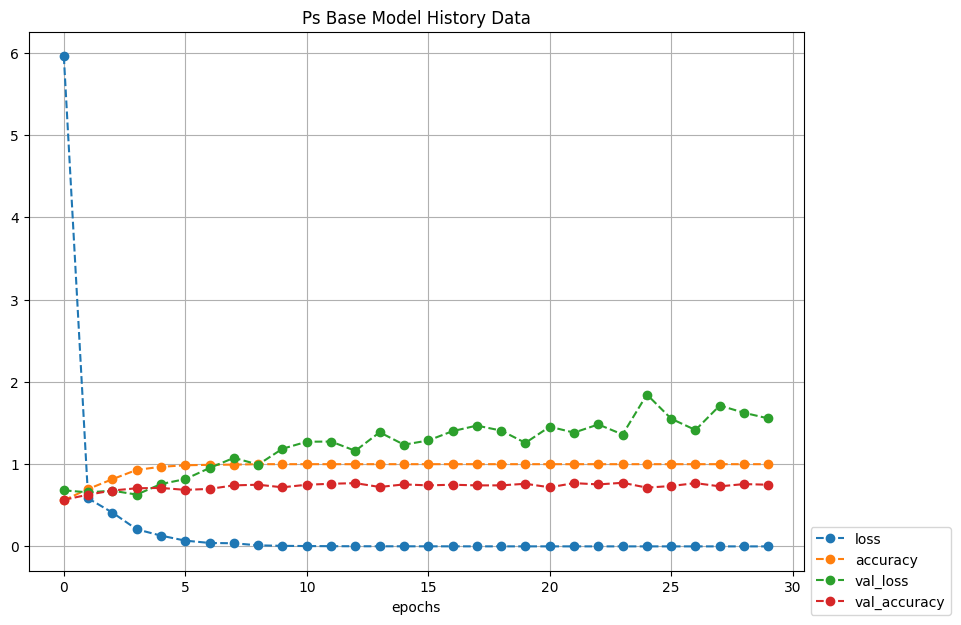

In [101]:
_helper.evaluation.history_plot(
  ps_base_model_h,
  specification = "all",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

Comparison of Base Model with 50% and 100% of Data

In [102]:
ps_base_model_eval = ps_base_model.evaluate(test_data_ps)

16/16 [==============================] - 7s 371ms/step - loss: 1.5590 - accuracy: 0.7640


In [105]:
print(
  f"Validation with 50% accuracy:{ps_base_model_h.history['val_accuracy'][-1]} loss:{ps_base_model_h.history['val_loss'][-1]}\n" +
  f"Validation with 100% accuracy:{ps_base_model_eval[1]} loss:{ps_base_model_eval[0]}"
)

Validation with 50% accuracy:0.75 loss:1.5559628009796143
Validation with 100% accuracy:0.7639999985694885 loss:1.5590075254440308


In [104]:
_helper.notifications.complete()

Save File

In [ ]:
_helper.save_load.save(
  ps_base_model,
  ps_base_model_h,
  save_dir,
  "PS_Model_0"
)

### Model lr

Model Architecture Defining and Compilation

In [96]:
ps_model_lr = Sequential([
  Conv2D(
    filters = 10,
    kernel_size = 3,
    activation = "relu",
    input_shape = (224, 224, 3),
    name = "input_layer"
  ),
  Conv2D(
    10, 3,
    activation = "relu",
    name = "hidden_layer_1"
  ),
  MaxPooling2D(name = "pooling_layer_1"),
  Conv2D(
    10, 3,
    activation = "relu",
    name = "hidden_layer_2"
  ),
  Conv2D(
    10, 3,
    activation = "relu",
    name = "hidden_layer_3"
  ),
  MaxPooling2D(name = "pooling_layer_2"),
  Flatten(name = "fully_connected_layer"),
  Dense(
    1,
    activation = "sigmoid",
    name = "output_layer"
  )
], name = "PS_Model_LR")

ps_model_lr.compile(
  loss = "binary_crossentropy",
  optimizer = Adam(),
metrics = ["accuracy"]
)

ps_model_lr.summary()

Model: "PS_Model_LR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 hidden_layer_1 (Conv2D)     (None, 220, 220, 10)      910       
                                                                 
 pooling_layer_1 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 hidden_layer_2 (Conv2D)     (None, 108, 108, 10)      910       
                                                                 
 hidden_layer_3 (Conv2D)     (None, 106, 106, 10)      910       
                                                                 
 pooling_layer_2 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                   

Training/Fitting model

In [15]:
try:
  lr_scheduler = LearningRateScheduler(lambda epoch: 0.0001 * 10**(epoch/6))

  ps_model_lr_h = ps_model_lr.fit(
    train_data_ps,
    epochs = 30,
    validation_data = test_data_ps,
    validation_steps = int(.50 * len(test_data_ps)),
    callbacks = [lr_scheduler]
  )
  _helper.notifications.complete()
except Exception as e:
  print(f"Error: {e}")
  _helper.notifications.error()

Epoch 1/30
47/47 [==============================] - 52s 1s/step - loss: 4.9322 - accuracy: 0.6380 - val_loss: 2.5640 - val_accuracy: 0.6875 - lr: 1.0000e-04
Epoch 2/30
47/47 [==============================] - 53s 1s/step - loss: 1.6295 - accuracy: 0.6880 - val_loss: 1.1790 - val_accuracy: 0.7031 - lr: 1.4678e-04
Epoch 3/30
47/47 [==============================] - 52s 1s/step - loss: 1.3218 - accuracy: 0.6947 - val_loss: 0.7913 - val_accuracy: 0.7344 - lr: 2.1544e-04
Epoch 4/30
47/47 [==============================] - 50s 1s/step - loss: 0.6451 - accuracy: 0.7747 - val_loss: 1.3507 - val_accuracy: 0.6641 - lr: 3.1623e-04
Epoch 5/30
47/47 [==============================] - 55s 1s/step - loss: 0.5327 - accuracy: 0.7933 - val_loss: 0.5672 - val_accuracy: 0.7695 - lr: 4.6416e-04
Epoch 6/30
47/47 [==============================] - 50s 1s/step - loss: 0.3153 - accuracy: 0.8727 - val_loss: 0.5799 - val_accuracy: 0.7578 - lr: 6.8129e-04
Epoch 7/30
47/47 [==============================] - 52s 1s

Per Piece Evaluation

In [40]:
save_dir = "./saved_files/CNNS/pizza_steak/model_lr/"

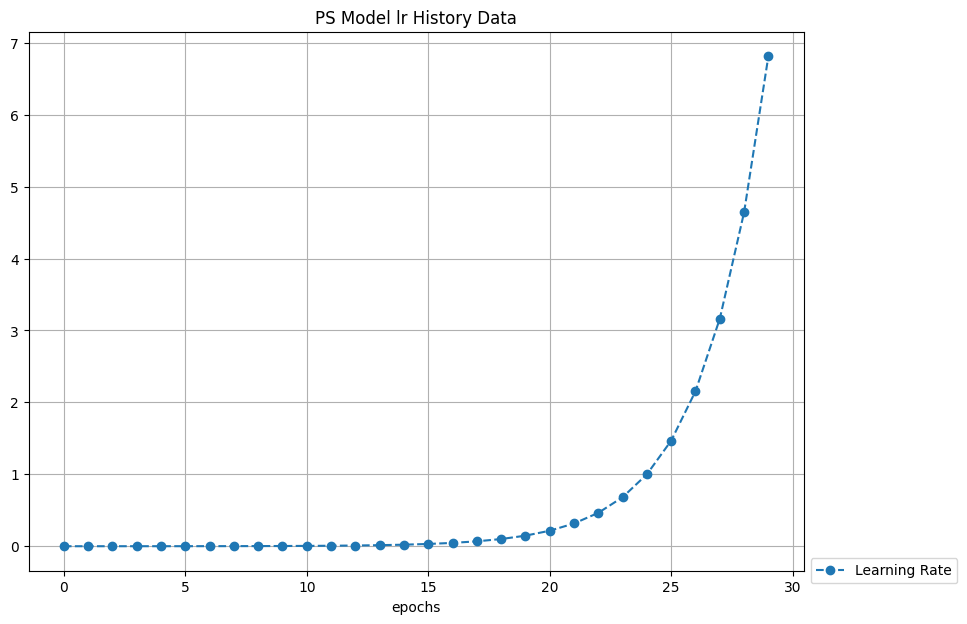

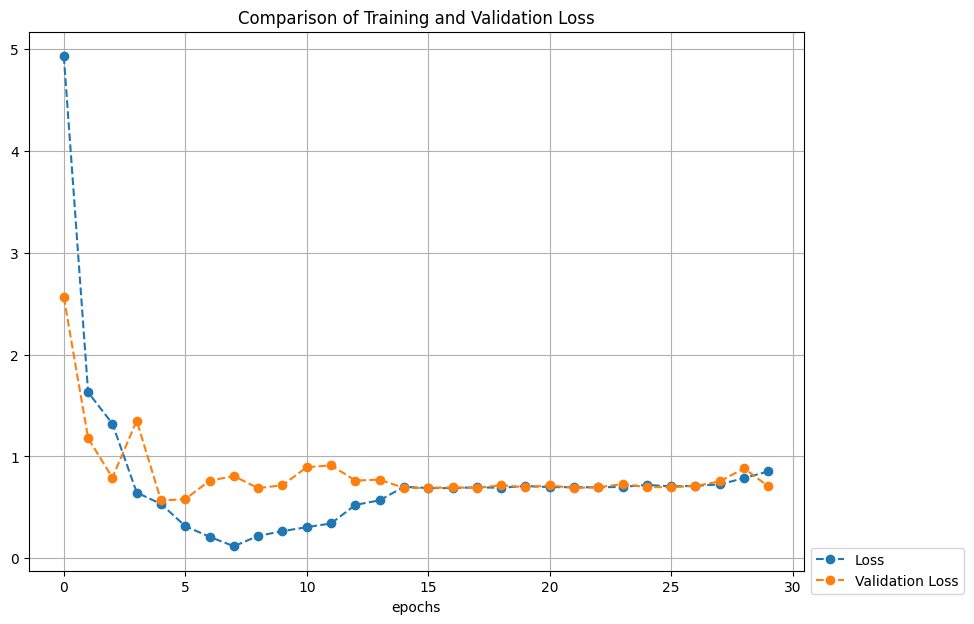

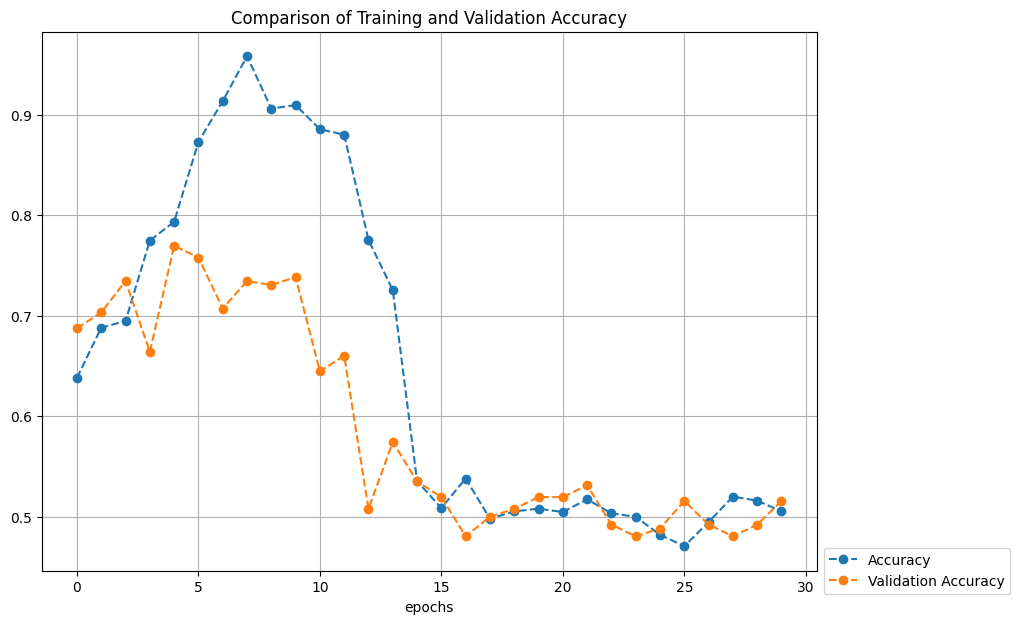

In [52]:
_helper.evaluation.history_plot(
  ps_model_lr_h,
  specification = "lr",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = "PS_Model_lr_History_Data"
)

_helper.evaluation.history_plot(
  ps_model_lr_h,
  specification = "comp_loss",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = "PS_Model_lr_History_Data"
)

_helper.evaluation.history_plot(
  ps_model_lr_h,
  specification = "comp_accuracy",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = "PS_Model_lr_History_Data"
)

Lowest Loss in LR

In [67]:
learning_rate = ps_model_lr_h.history["lr"][7]

Full Evaluation

Error: 'method_descriptor' object is not iterable


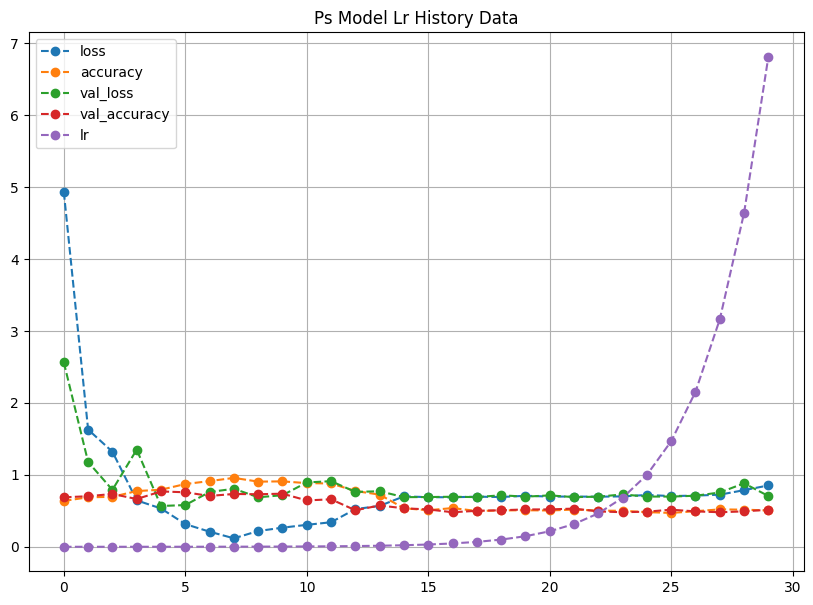

In [62]:
_helper.evaluation.history_plot(
  ps_model_lr_h,
  specification = "all",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = "PS_Model_lr_History_Data"
)

Save File

In [66]:
_helper.save_load.save(
  ps_model_lr, ps_model_lr_h,
  save_dir,
  "PS_Model_lr"
)

Model is saved to ./saved_files/CNNS/pizza_steak/model_lr/PS_Model_lr_2022_08_31 - 19.h5 and ./saved_files/CNNS/pizza_steak/model_lr/PS_Model_lr_diagram.png
History is saved to ./saved_files/CNNS/pizza_steak/model_lr/PS_Model_lr_2022_08_31 - 19_history.json


### Model 0

Duplicating Model Architecture from Model lr and Re-compilation

In [73]:
ps_model_0 = ps_model_lr
ps_model_0._name = "PS_Model_0"

ps_model_0.compile(
  loss = "binary_crossentropy",
  optimizer = Adam(learning_rate = learning_rate),
  metrics = ["accuracy"]
)

ps_model_0.summary()


Model: "PS_Model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 hidden_layer_1 (Conv2D)     (None, 220, 220, 10)      910       
                                                                 
 pooling_layer_1 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 hidden_layer_2 (Conv2D)     (None, 108, 108, 10)      910       
                                                                 
 hidden_layer_3 (Conv2D)     (None, 106, 106, 10)      910       
                                                                 
 pooling_layer_2 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Training/Fitting model

In [78]:
try:
  ps_model_0_h = ps_model_0.fit(
    train_data_ps,
    epochs = 30,
    validation_data = test_data_ps,
    validation_steps = int(.50 * len(test_data_ps)),
  )
  _helper.notifications.complete()
except Exception as e:
  print(f"Error: {e}")
  _helper.notifications.error()

Epoch 1/30
47/47 [==============================] - 53s 1s/step - loss: 2.4338e-04 - accuracy: 1.0000 - val_loss: 1.4655 - val_accuracy: 0.8125
Epoch 2/30
47/47 [==============================] - 49s 1s/step - loss: 2.1280e-04 - accuracy: 1.0000 - val_loss: 1.5305 - val_accuracy: 0.7852
Epoch 3/30
47/47 [==============================] - 49s 1s/step - loss: 1.8431e-04 - accuracy: 1.0000 - val_loss: 1.4125 - val_accuracy: 0.8086
Epoch 4/30
47/47 [==============================] - 49s 1s/step - loss: 1.6650e-04 - accuracy: 1.0000 - val_loss: 1.4400 - val_accuracy: 0.7930
Epoch 5/30
47/47 [==============================] - 49s 1s/step - loss: 1.5465e-04 - accuracy: 1.0000 - val_loss: 1.1726 - val_accuracy: 0.8125
Epoch 6/30
47/47 [==============================] - 49s 1s/step - loss: 1.3299e-04 - accuracy: 1.0000 - val_loss: 1.4702 - val_accuracy: 0.7930
Epoch 7/30
47/47 [==============================] - 51s 1s/step - loss: 1.2048e-04 - accuracy: 1.0000 - val_loss: 1.4495 - val_accuracy:

Per Piece Evaluation

In [79]:
save_dir = "./saved_files/CNNS/pizza_steak/model_0"
name = "PS_Model_0_History_Data"

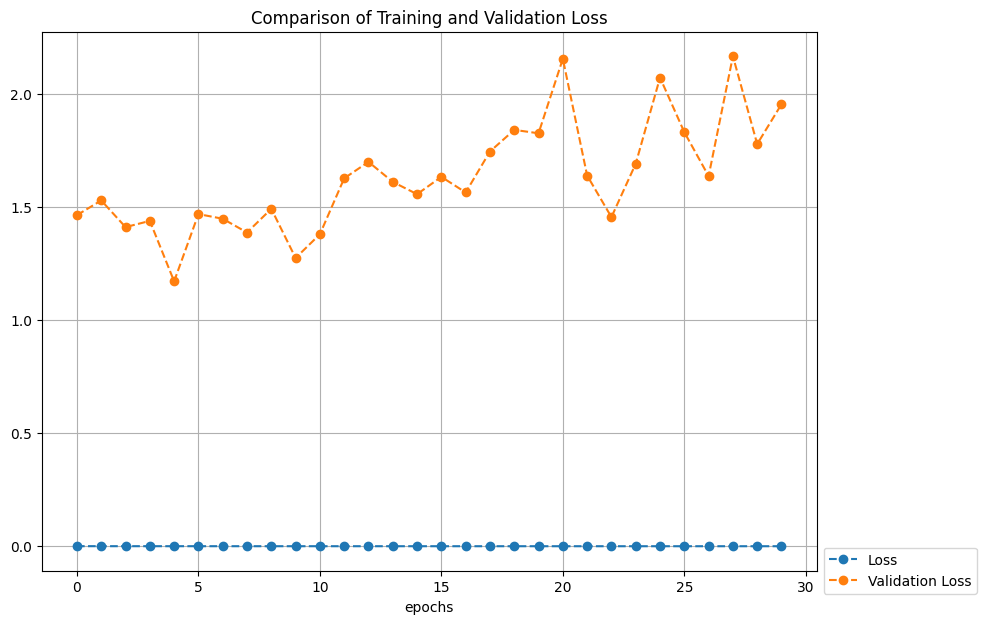

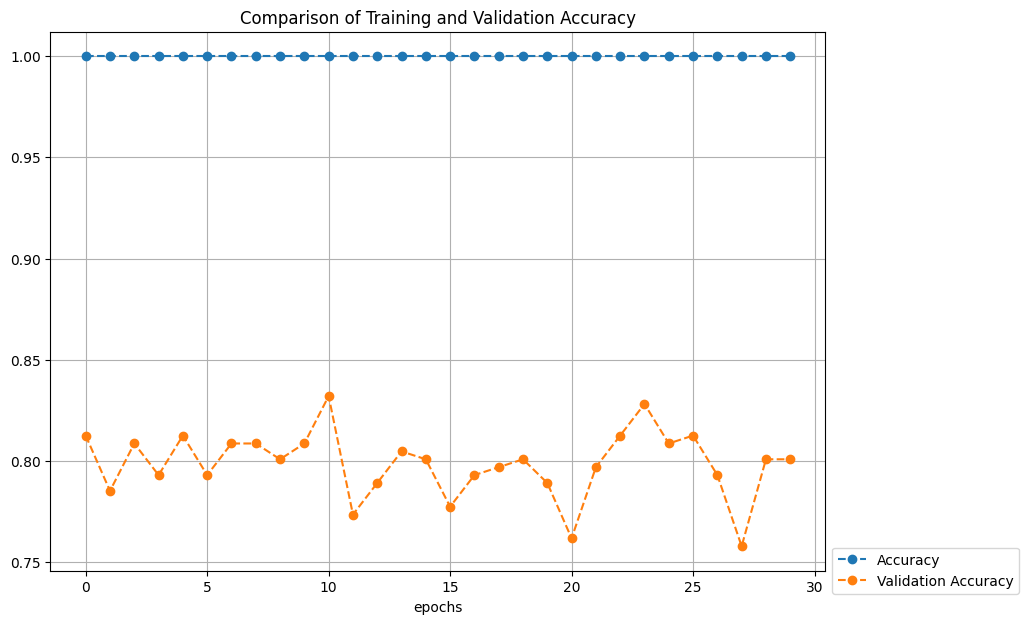

In [80]:
_helper.evaluation.history_plot(
  ps_model_0_h,
  specification = "comp_loss",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

_helper.evaluation.history_plot(
  ps_model_0_h,
  specification = "comp_accuracy",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

Full Evaluation

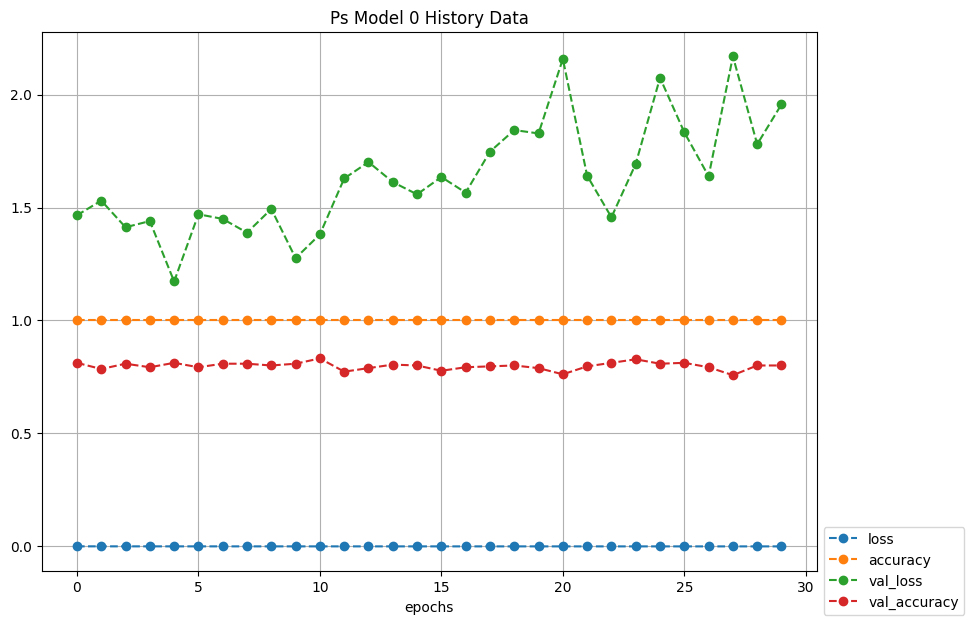

In [81]:
_helper.evaluation.history_plot(
  ps_model_0_h,
  specification = "all",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

Evaluation of Model 0 with Full Data

In [89]:
ps_model_0_eval = ps_model_0.evaluate(test_data_ps)

16/16 [==============================] - 5s 298ms/step - loss: 1.9040 - accuracy: 0.7920


Comparison of Model 0 50% and 100% Data

In [106]:
print(
  f"Validation with 50% accuracy:{ps_model_0_h.history['val_accuracy'][-1]} loss:{ps_model_0_h.history['val_loss'][-1]}\n" +
  f"Validation with 100% accuracy:{ps_model_0_eval[1]} loss:{ps_model_0_eval[0]}"
)


Validation with 50% accuracy:0.80078125 loss:1.9564719200134277
Validation with 100% accuracy:0.7919999957084656 loss:1.9039995670318604


Save File

In [82]:
_helper.save_load.save(
  ps_model_0,
  ps_model_0_h,
  save_dir,
  "PS_Model_0"
)

Model is saved to ./saved_files/CNNS/pizza_steak/model_0/PS_Model_0_2022_08_31 - 20.h5 and ./saved_files/CNNS/pizza_steak/model_0/PS_Model_0_diagram.png
History is saved to ./saved_files/CNNS/pizza_steak/model_0/PS_Model_0_2022_08_31 - 20_history.json


## Summary

Architecture:

(Input -> Conv2D -> Conv2D -> Pooling -> Conv2D -> Conv2D -> Pooling -> Flatten -> Dense -> Output)

| Model | Specification | Accuracy | Loss | Note |
| --- | --- | --- | --- | --- |
| Base Model | Base | 75.00 | 1.56 | To Set Base Data of Improvement |
| Base Model | Evaluation | 76.40 | 1.56 | Evaluation of Full Test Data |
| Model lr | LR Identification | - | - | To Set Values for Learning Rate |
| Model 0 | Adjusted by LR | 80.07 | 1.96 | Base upon Model LR, Adam LR are set |
| Model 0 | Evaluation | 79.20 | 1.90 | Evaluation of Full Test Data |

Summary: Model 0 that has been adjusted by LR Increases the Accuracy by 0.2%

# Activity 2

## Preparation of Test and Train Data set

In [12]:
test_data_ps, train_data_ps, class_names = _helper.data_preparations.train_test_dir_setter(
  "./resources/pizza_steak/",
)

print(
  "\n\n" +
  "Data Count: \n" +
  f"Train: {len(train_data_ps)}\n" +
  f"Test: {len(test_data_ps)}\n" +
  f"Class names #: {len(class_names)}"
)

Test Data: 
Found 500 files belonging to 2 classes.
Train Data: 
Found 1500 files belonging to 2 classes.
Class Names: ['pizza', 'steak']


Data Count: 
Train: 47
Test: 16
Class names #: 2


## Model

### Base Model

Model Architecture Defining and Compilation

In [107]:
b_model_0 = Sequential([
  Conv2D(
    10, 3,
    padding = "valid",
    activation = "relu",
    input_shape = (224, 224, 3),
    name = "hidden_layer_1"
  ),
  Conv2D(
    10, 3,
    activation = "relu",
    name = "hidden_layer_2"
  ),
  Conv2D(
    10, 3,
    activation = "relu",
    name = "hidden_layer_3"
  ),
  Flatten(name = "flattening_layer"),
  Dense(
    1,
    activation = "sigmoid",
    name = "fully_connected_layer"
  )
], name = "Binary_Model_0")

b_model_0.compile(
  loss = "binary_crossentropy",
  optimizer = Adam(),
  metrics = ["accuracy"]
)

b_model_0.summary()

Model: "Binary_Model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Conv2D)     (None, 222, 222, 10)      280       
                                                                 
 hidden_layer_2 (Conv2D)     (None, 220, 220, 10)      910       
                                                                 
 hidden_layer_3 (Conv2D)     (None, 218, 218, 10)      910       
                                                                 
 flattening_layer (Flatten)  (None, 475240)            0         
                                                                 
 fully_connected_layer (Dens  (None, 1)                475241    
 e)                                                              
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
______________________________________________

Training/Fitting Model

In [109]:
try:
  b_model_0_h = b_model_0.fit(
    train_data_ps,
    epochs = 5,
    validation_data = test_data_ps,
    validation_steps = int(.5 * len(test_data_ps))
  )
  
  _helper.notifications.model_callback_notification()
except Exception as e:
  print(f"Error: {e}")
  _helper.notifications.error()

Epoch 1/5
47/47 [==============================] - 65s 1s/step - loss: 4.0258 - accuracy: 0.7033 - val_loss: 2.5917 - val_accuracy: 0.7227
Epoch 2/5
47/47 [==============================] - 64s 1s/step - loss: 0.6093 - accuracy: 0.8647 - val_loss: 2.3141 - val_accuracy: 0.6523
Epoch 3/5
47/47 [==============================] - 66s 1s/step - loss: 0.1523 - accuracy: 0.9560 - val_loss: 1.5953 - val_accuracy: 0.7188
Epoch 4/5
47/47 [==============================] - 62s 1s/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 1.3391 - val_accuracy: 0.7617
Epoch 5/5
47/47 [==============================] - 63s 1s/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 1.5310 - val_accuracy: 0.7500


Per Piece Evaluation

In [110]:
save_dir = "./saved_files/CNNS/pizza_steak_2/"
name = "Binary_Model_0_History_Data"

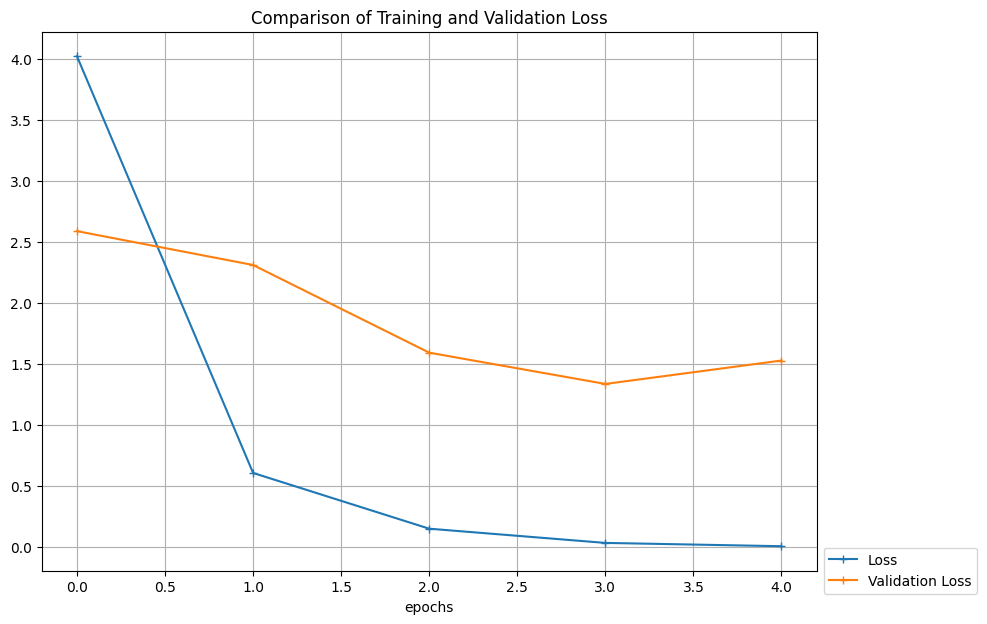

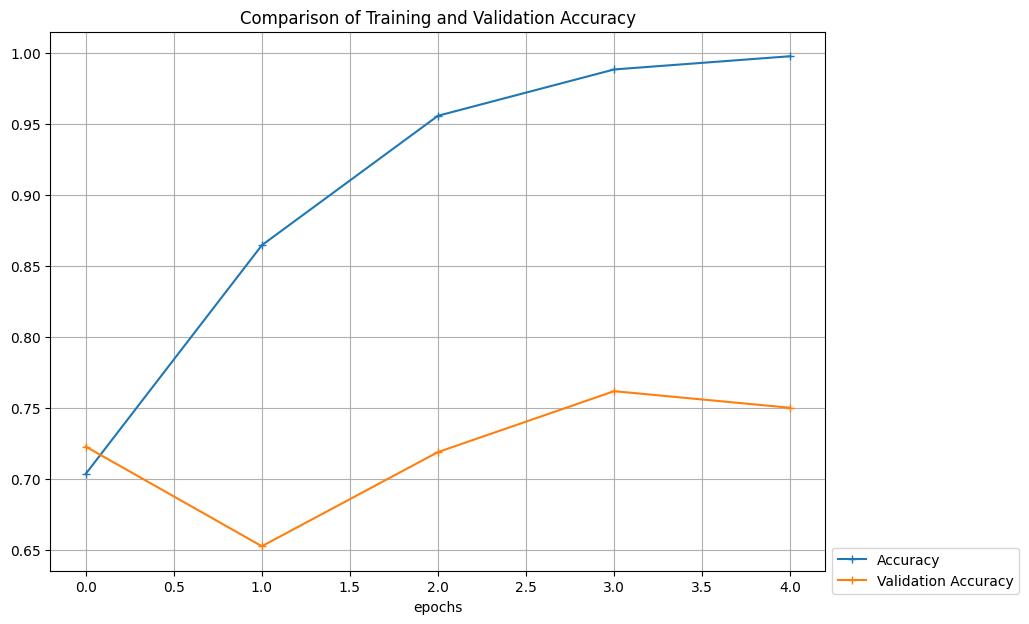

In [111]:
_helper.evaluation.history_plot(
  b_model_0_h,
  specification = "comp_loss",
  grid = True,
  plot_style = "+-",
  save_path = save_dir,
  name = name
)

_helper.evaluation.history_plot(
  b_model_0_h,
  specification = "comp_accuracy",
  grid = True,
  plot_style = "+-",
  save_path = save_dir,
  name = name
)

Full Evaluation

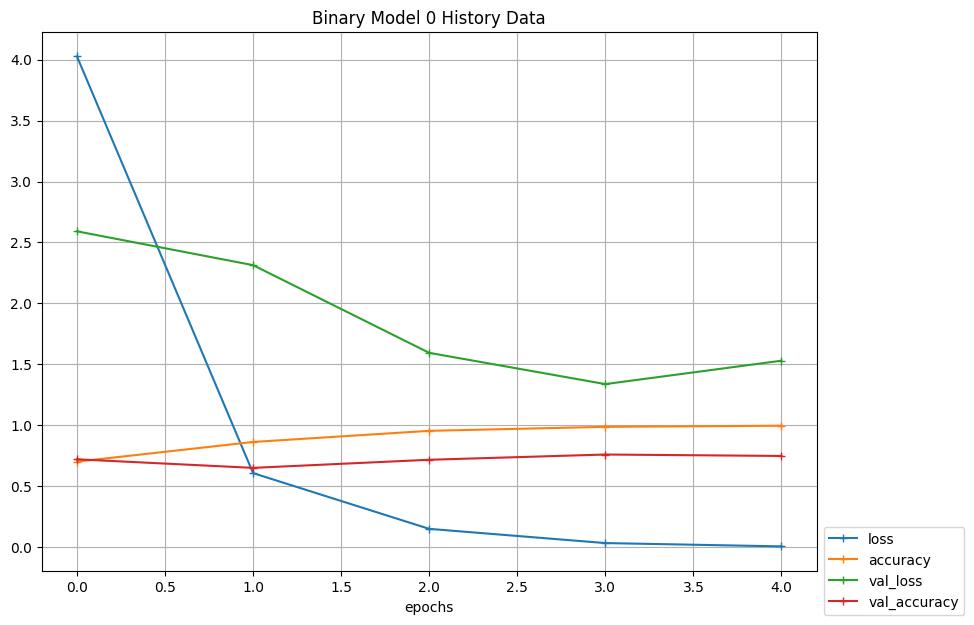

In [112]:
_helper.evaluation.history_plot(
  b_model_0_h,
  grid = True,
  plot_style = "+-",
  save_path = save_dir,
  name = name
)

Comparison of Base Model with 50% and 100% of Data

In [113]:
eval = b_model_0.evaluate(test_data_ps)

16/16 [==============================] - 7s 390ms/step - loss: 1.6902 - accuracy: 0.7180


In [115]:
print(
  f"Validation with 50% Data Loss:{b_model_0_h.history['val_loss'][-1]} Accuracy:{b_model_0_h.history['val_accuracy'][-1]}\n" +
  f"Validation with 100% Data Loss:{eval[0]} Accuracy:{eval[1]}"
)

Validation with 50% Data Loss:1.5310184955596924 Accuracy:0.75
Validation with 100% Data Loss:1.690226674079895 Accuracy:0.7179999947547913


Save File

In [116]:
_helper.save_load.save(
  b_model_0,
  b_model_0_h,
  save_dir,
  "Binary_Model_0"
)

Model is saved to ./saved_files/CNNS/pizza_steak_2/Binary_Model_0_2022_08_31 - 23.h5 and ./saved_files/CNNS/pizza_steak_2/Binary_Model_0_diagram.png
History is saved to ./saved_files/CNNS/pizza_steak_2/Binary_Model_0_2022_08_31 - 23_history.json


## Model lr

Duplicating Model Architecture from base model and Re-compilation

In [125]:
b_model_lr = b_model_0
b_model_lr._name = "Binary_Model_LR"

b_model_lr.compile(
  loss = "binary_crossentropy",
  optimizer = Adam(),
  metrics = ["accuracy"]
)

b_model_lr.summary()

Model: "Binary_Model_LR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Conv2D)     (None, 222, 222, 10)      280       
                                                                 
 hidden_layer_2 (Conv2D)     (None, 220, 220, 10)      910       
                                                                 
 hidden_layer_3 (Conv2D)     (None, 218, 218, 10)      910       
                                                                 
 flattening_layer (Flatten)  (None, 475240)            0         
                                                                 
 fully_connected_layer (Dens  (None, 1)                475241    
 e)                                                              
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_____________________________________________

Training/Fitting model

In [126]:
try:
  lr_scheduler = LearningRateScheduler(lambda epoch: 0.0001 * 10**(epoch/6))

  b_model_lr_h = b_model_lr.fit(
    train_data_ps,
    epochs = 30,
    validation_data = test_data_ps,
    validation_steps = int(.5 * len(test_data_ps)),
    callbacks = [lr_scheduler]
  )
  
  _helper.notifications.model_callback_notification()
except Exception as e:
  print(f"Error: {e}")
  _helper.notifications.error()

Epoch 1/30
47/47 [==============================] - 59s 1s/step - loss: 0.7283 - accuracy: 0.5000 - val_loss: 0.7425 - val_accuracy: 0.4727 - lr: 1.0000e-04
Epoch 2/30
47/47 [==============================] - 58s 1s/step - loss: 0.7277 - accuracy: 0.5000 - val_loss: 0.7355 - val_accuracy: 0.4844 - lr: 1.4678e-04
Epoch 3/30
47/47 [==============================] - 58s 1s/step - loss: 0.7268 - accuracy: 0.5000 - val_loss: 0.7384 - val_accuracy: 0.4766 - lr: 2.1544e-04
Epoch 4/30
47/47 [==============================] - 58s 1s/step - loss: 0.7256 - accuracy: 0.5000 - val_loss: 0.7170 - val_accuracy: 0.5156 - lr: 3.1623e-04
Epoch 5/30
47/47 [==============================] - 58s 1s/step - loss: 0.7239 - accuracy: 0.5000 - val_loss: 0.7439 - val_accuracy: 0.4570 - lr: 4.6416e-04
Epoch 6/30
47/47 [==============================] - 58s 1s/step - loss: 0.7216 - accuracy: 0.5000 - val_loss: 0.7293 - val_accuracy: 0.4805 - lr: 6.8129e-04
Epoch 7/30
47/47 [==============================] - 58s 1s

Per Piece Evaluation

In [127]:
save_dir = "./saved_files/CNNS/pizza_steak_2/model_lr"
name = "Binary_Base_Model_History_Data"

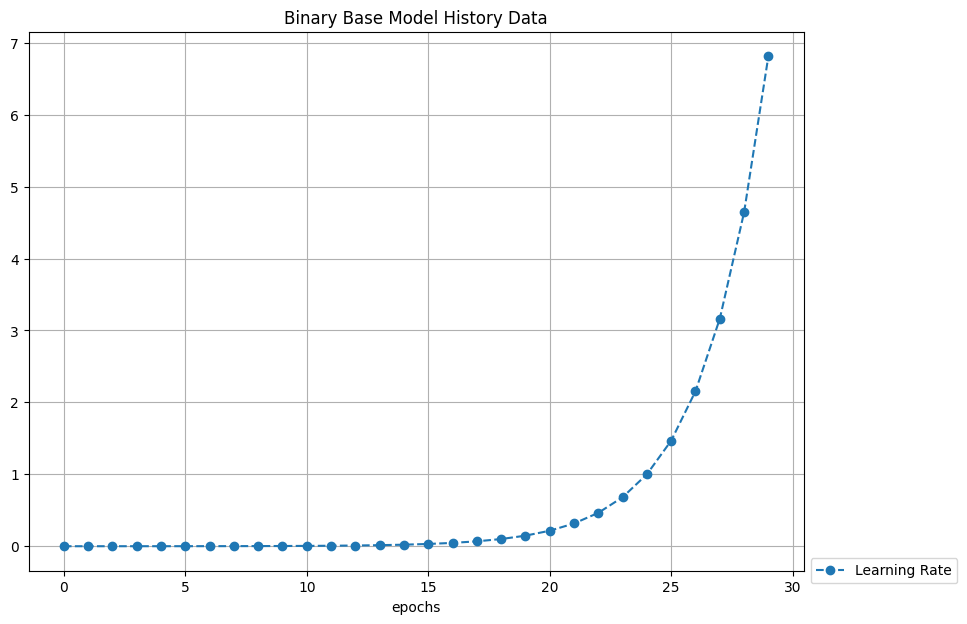

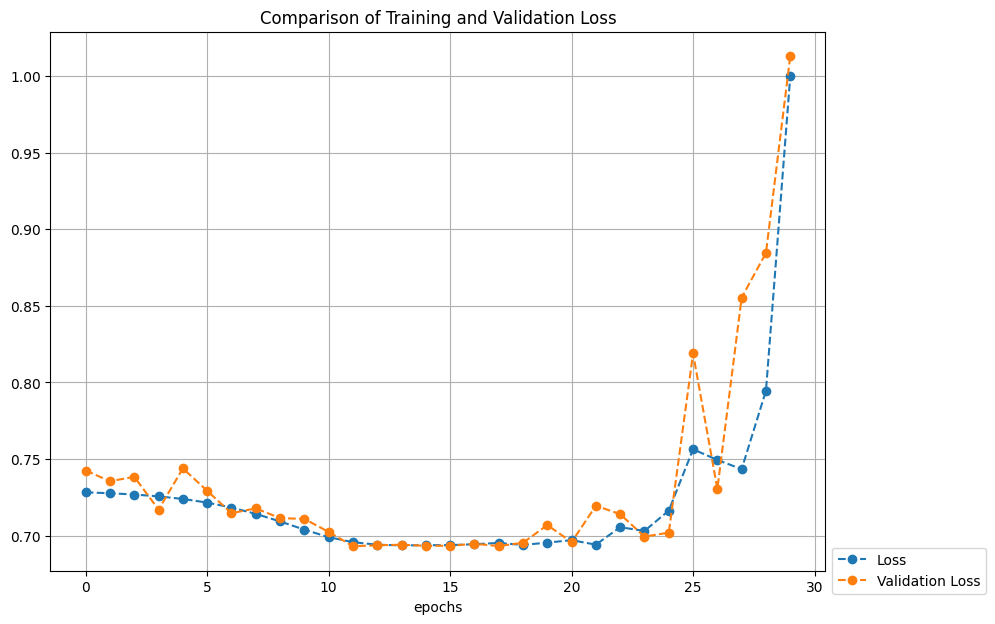

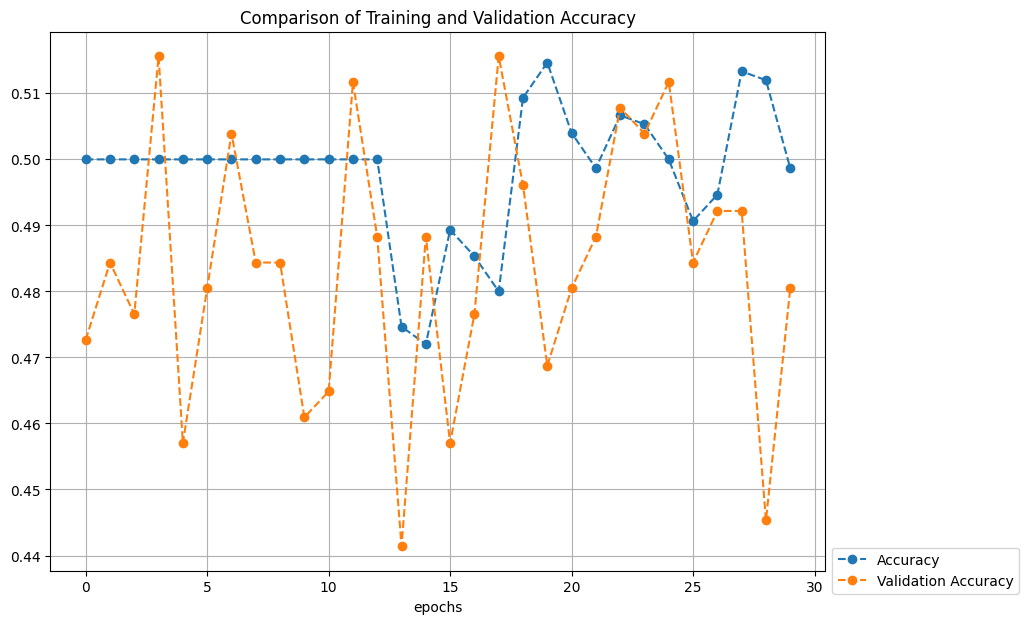

In [128]:
_helper.evaluation.history_plot(
  b_model_lr_h,
  specification = "lr",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

_helper.evaluation.history_plot(
  b_model_lr_h,
  specification = "comp_loss",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

_helper.evaluation.history_plot(
  b_model_lr_h,
  specification = "comp_accuracy",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

In [129]:
_helper.notifications.complete()

Lowest Loss in LR

In [140]:
learning_rate = b_model_lr_h.history["lr"][11]
learning_rate

0.006812921

In [15]:
learning_rate = 0.006812921

Full Evaluation

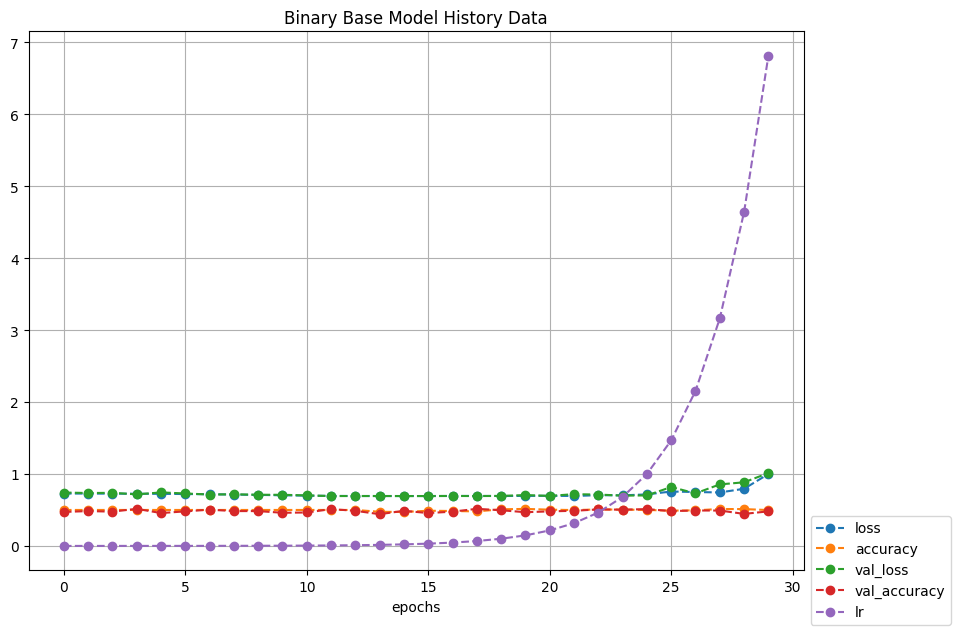

In [141]:
_helper.evaluation.history_plot(
  b_model_lr_h,
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

Save File

In [142]:
_helper.save_load.save(
  b_model_lr,
  b_model_lr_h,
  save_dir,
  "Binary_Model_LR"
)

Model is saved to ./saved_files/CNNS/pizza_steak_2/model_lr/Binary_Model_LR_2022_09_01 - 00.h5 and ./saved_files/CNNS/pizza_steak_2/model_lr/Binary_Model_LR_diagram.png
History is saved to ./saved_files/CNNS/pizza_steak_2/model_lr/Binary_Model_LR_2022_09_01 - 00_history.json


## Model 1: Applying Model LR Evaluation

Duplicating Model Architecture from Model lr and Re-compilation

In [16]:
b_model_1 = Sequential([
  Conv2D(
    10, 3,
    padding = "valid",
    activation = "relu",
    input_shape = (224, 224, 3),
    name = "hidden_layer_1"
  ),
  Conv2D(
    10, 3,
    activation = "relu",
    name = "hidden_layer_2"
  ),
  Conv2D(
    10, 3,
    activation = "relu",
    name = "hidden_layer_3"
  ),
  Flatten(name = "flattening_layer"),
  Dense(
    1,
    activation = "sigmoid",
    name = "fully_connected_layer"
  )
], name = "Binary_Model_1")

b_model_1.compile(
  loss = "binary_crossentropy",
  optimizer = Adam(learning_rate = learning_rate),
  metrics = ["accuracy"]
)

b_model_1.summary()

Model: "Binary_Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Conv2D)     (None, 222, 222, 10)      280       
                                                                 
 hidden_layer_2 (Conv2D)     (None, 220, 220, 10)      910       
                                                                 
 hidden_layer_3 (Conv2D)     (None, 218, 218, 10)      910       
                                                                 
 flattening_layer (Flatten)  (None, 475240)            0         
                                                                 
 fully_connected_layer (Dens  (None, 1)                475241    
 e)                                                              
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
______________________________________________

Training/Fitting model

In [18]:
try:
  b_model_1_h = b_model_1.fit(
    train_data_ps,
    epochs = 5,
    validation_data = test_data_ps,
    validation_steps = int(.5 * len(test_data_ps)),
  )
  
  _helper.notifications.complete()
except Exception as e:
  print(f"Error: {e}")
  _helper.notifications.error()

Epoch 1/5
47/47 [==============================] - 69s 1s/step - loss: 0.6885 - accuracy: 0.4820 - val_loss: 0.6935 - val_accuracy: 0.4805
Epoch 2/5
47/47 [==============================] - 87s 2s/step - loss: 0.6882 - accuracy: 0.4873 - val_loss: 0.6933 - val_accuracy: 0.4844
Epoch 3/5
47/47 [==============================] - 84s 2s/step - loss: 0.6901 - accuracy: 0.5013 - val_loss: 0.6934 - val_accuracy: 0.5039
Epoch 4/5
47/47 [==============================] - 87s 2s/step - loss: 0.6889 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.5156
Epoch 5/5
47/47 [==============================] - 84s 2s/step - loss: 0.6882 - accuracy: 0.4893 - val_loss: 0.6930 - val_accuracy: 0.5234


In [20]:
eval = b_model_1.evaluate(train_data_ps)

47/47 [==============================] - 24s 491ms/step - loss: 0.6831 - accuracy: 0.5160


Per Piece Evaluation

In [22]:
save_dir = "./saved_files/CNNS/pizza_steak_2/model_1"
name = "Binary_Model_1_History_Data"

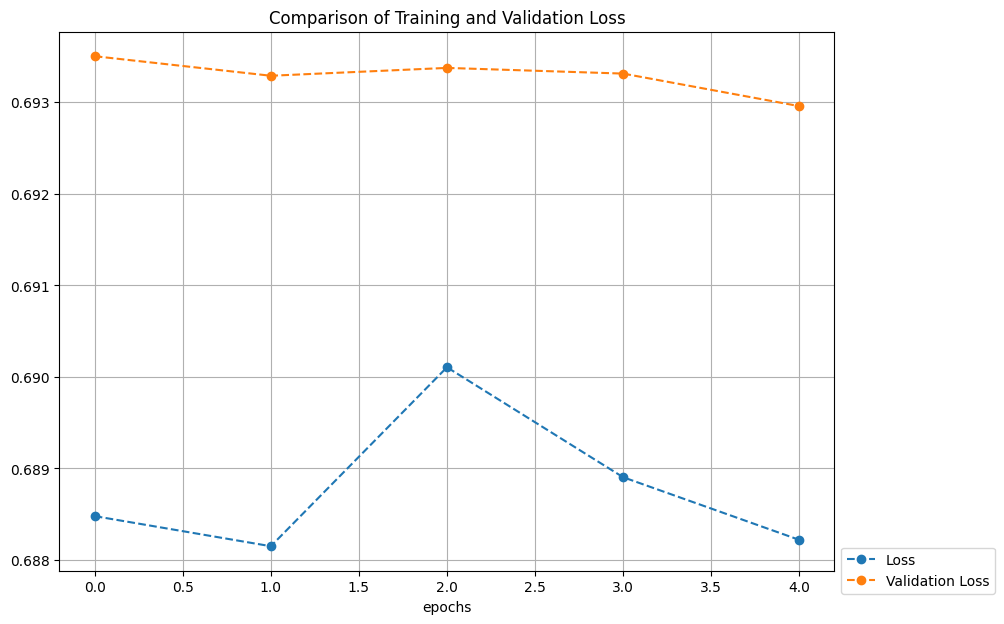

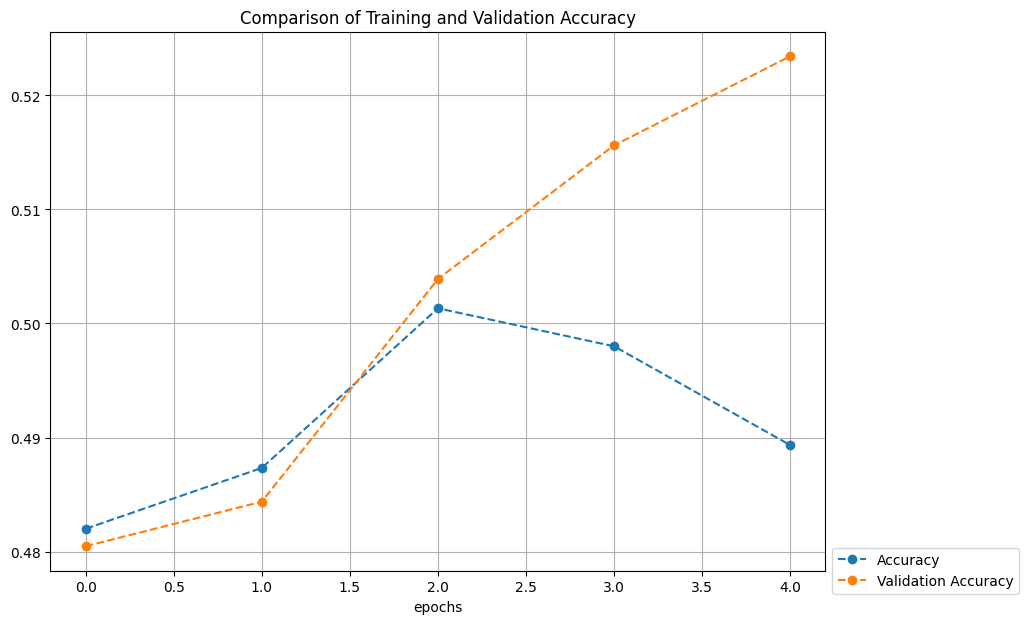

In [23]:
_helper.evaluation.history_plot(
  b_model_1_h,
  specification = "comp_loss",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

_helper.evaluation.history_plot(
  b_model_1_h,
  specification = "comp_accuracy",
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

Full Evaluation

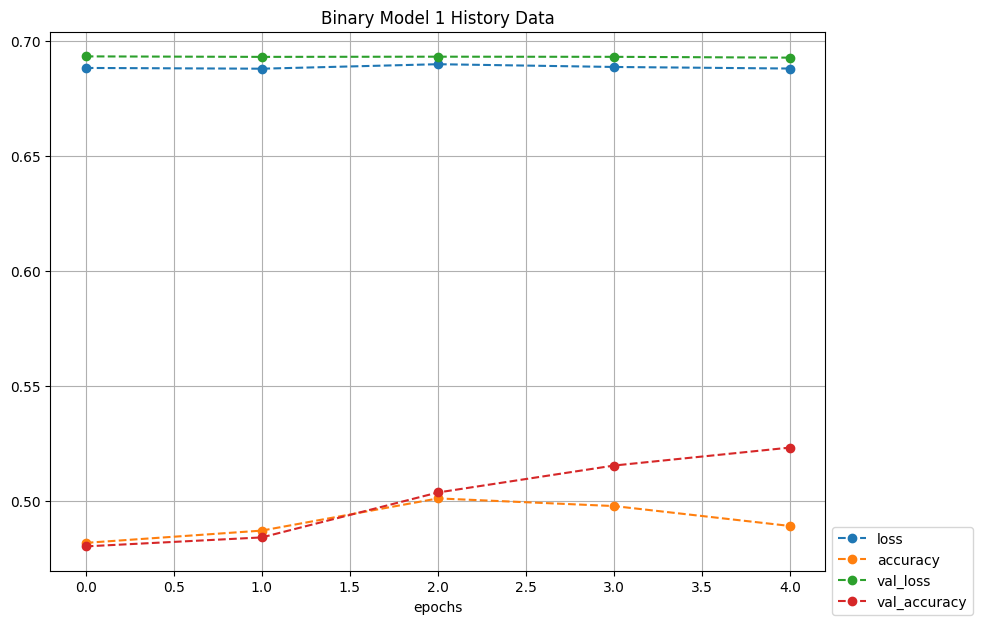

In [24]:
_helper.evaluation.history_plot(
  b_model_1_h,
  grid = True,
  plot_style = "o--",
  save_path = save_dir,
  name = name
)

Save Files

In [25]:
_helper.save_load.save(
  b_model_1,
  b_model_1_h,
  save_dir,
  "Binary_Model_1"
)

Model is saved to ./saved_files/CNNS/pizza_steak_2/model_1/Binary_Model_1_2022_09_15 - 11.h5 and ./saved_files/CNNS/pizza_steak_2/model_1/Binary_Model_1_diagram.png
History is saved to ./saved_files/CNNS/pizza_steak_2/model_1/Binary_Model_1_2022_09_15 - 11_history.json


## Model 2: Pooling/Regularization

In [27]:
b_model_2 = Sequential([
  Conv2D(
    10, 3, input_shape = (224, 224, 3),
    activation = "relu", name = "hidden_layer_1"),
  MaxPooling2D(name = "pooling_layer_1"),
  Conv2D(10, 3, activation = "relu", name = "hidden_layer_2"),
  MaxPooling2D(name = "pooling_2"),
  Conv2D(10, 3, activation = "relu", name = "hidden_layer_3"),
  MaxPooling2D(name = "pooling_3"),
  Flatten(name = "fully_connected_layer"),
  Dense(1, activation = "sigmoid", name = "out_put_layer")
])

b_model_2.compile(
  loss = "binary_crossentropy",
  optimizer = Adam(),
  metrics = "accuracy"
)

b_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Conv2D)     (None, 222, 222, 10)      280       
                                                                 
 pooling_layer_1 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 hidden_layer_2 (Conv2D)     (None, 109, 109, 10)      910       
                                                                 
 pooling_2 (MaxPooling2D)    (None, 54, 54, 10)        0         
                                                                 
 hidden_layer_3 (Conv2D)     (None, 52, 52, 10)        910       
                                                                 
 pooling_3 (MaxPooling2D)    (None, 26, 26, 10)        0         
                                                      

Training/Fitting model

In [29]:
b_model_2.fit(
  train_data_ps,
  epochs = 5,
  validation_data = test_data_ps,
  validation_steps = int(.5 * len(test_data_ps))
)

_helper.notifications.complete()

Epoch 1/5
47/47 [==============================] - 39s 743ms/step - loss: 6.6294 - accuracy: 0.5667 - val_loss: 1.5868 - val_accuracy: 0.5898
Epoch 2/5
47/47 [==============================] - 33s 700ms/step - loss: 1.0124 - accuracy: 0.6207 - val_loss: 0.7332 - val_accuracy: 0.5547
Epoch 3/5
47/47 [==============================] - 34s 712ms/step - loss: 0.6039 - accuracy: 0.6800 - val_loss: 0.7377 - val_accuracy: 0.6016
Epoch 4/5
47/47 [==============================] - 35s 734ms/step - loss: 0.5154 - accuracy: 0.7453 - val_loss: 0.6829 - val_accuracy: 0.6328
Epoch 5/5
47/47 [==============================] - 34s 702ms/step - loss: 0.4376 - accuracy: 0.7933 - val_loss: 0.7293 - val_accuracy: 0.6680


## Summary

Architecture:
- Base Model
(Input -> Conv2D -> Conv2D -> Conv2D -> Flatten -> Dense -> Output)

| Model | Specification | Loss | Accuracy | Note |
| --- | --- | --- | --- | --- |
| Base Model | Base | 1.53 | 75.00% | To Set Base Data of Improvement |
| Base Model | Evaluation | 1.69 | 71.80% | Evaluation of Full Test Data |
| --- | --- | --- | --- | --- |

## Note:
#### Induce Over-fitting
- Increase Conv Layers
- Increase Conv filters
- add another dense layer to the output of the flattened layer

#### Reduce Over-fitting
- add data augmentations
- add regularization layers (MaxPool2D)
- add more data

# End